
# Final Grade Prediction Using Regression

This notebook performs EDA and trains a regression model to predict students' final grade (`G3`) using the student performance dataset on kaggle
link: https://www.kaggle.com/datasets/dipam7/student-grade-prediction

Target Variables(these grades are related with the course subject, Math or Portuguese): 

- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

Citation:

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.


In [1]:

import pandas as pd

# Load dataset
df = pd.read_csv("student-mat.csv")
df.head()


C:\Users\enely\AppData\Local\Temp\ipykernel_31096\2854397043.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [2]:

from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoded_df = df.copy()
label_encoders = {}

for column in encoded_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    encoded_df[column] = le.fit_transform(encoded_df[column])
    label_encoders[column] = le

encoded_df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


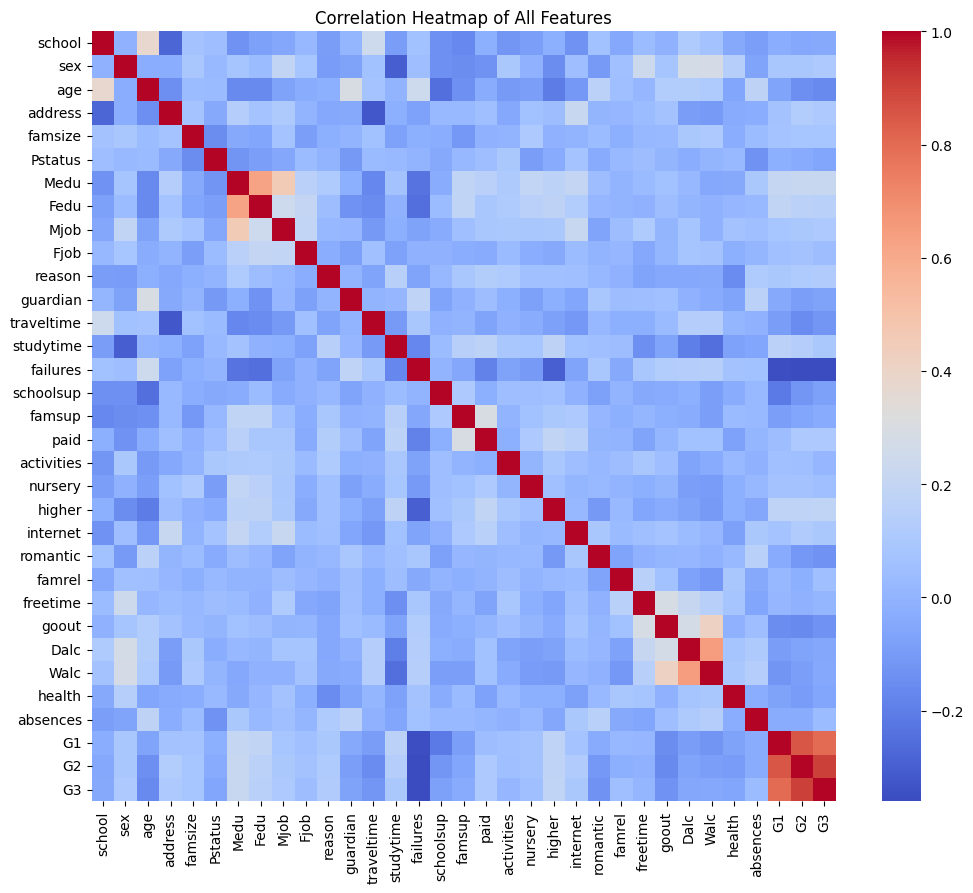

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
higher        0.182465
Fedu          0.152457
reason        0.121994
address       0.105756
sex           0.103456
Mjob          0.102082
paid          0.101996
internet      0.098483
studytime     0.097820
famsize       0.081407
nursery       0.051568
famrel        0.051363
Fjob          0.042286
absences      0.034247
activities    0.016100
freetime      0.011307
famsup       -0.039157
school       -0.045017
Walc         -0.051939
Dalc         -0.054660
Pstatus      -0.058009
health       -0.061335
guardian     -0.070109
schoolsup    -0.082788
traveltime   -0.117142
romantic     -0.129970
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = encoded_df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of All Features")
plt.show()

# Show top correlations with final grade
corr["G3"].sort_values(ascending=False)


In [4]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Train-test split
X = encoded_df.drop("G3", axis=1)
y = encoded_df["G3"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Feature importance
import pandas as pd
coefficients = pd.DataFrame({ "Feature": X.columns, "Coefficient": model.coef_ }).sort_values(by="Coefficient", ascending=False)
coefficients


R^2 Score: 0.75
Mean Squared Error: 5.03


,Feature,Coefficient
31,G2,0.954569
15,schoolsup,0.750961
1,sex,0.293869
23,famrel,0.289210
30,G1,0.206123
16,famsup,0.176043
25,goout,0.171814
12,traveltime,0.140033
20,higher,0.139570
6,Medu,0.115051


# Results

Top variables that positively correlate with G3(Final Grade)

| Feature     | Correlation | Meaning                                                     |
| ----------- | ----------- | ----------------------------------------------------------- |
| G2        | **0.95**    | Strongest predictor – prior term grade                      |
| School Support        | 0.75        | extra educational support plays a huge role                        |
| Sex      | 0.29       | Women do better on average                   |
| famrel    | 0.28       | A good relationship with your family helps        |
| G1 | 0.10        | first period grade correlates with final grade |

Top variables that negatively correlate with G3(Final Grade)
    
| Feature    | Correlation | Meaning                                                     |
| ---------- | ----------- | ----------------------------------------------------------- |
| `activities` | **-0.58**   | There is a moderate correlation between extracurricular activity and lower grade performance |
| `romantic`      | -0.40      | Students in relationships tend to have a lower final grade              |
| `failures`    | -0.38     | More past class failures correlate with lower performance      |
| `nursery` | -0.26     | attending nursery as a kid seems to correlate with lower performance |
| `internet` | -0.23     | home internet access correlates with lower performance |

